In [242]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from pathlib import Path
from statistics import mean

import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
# plt.rc('font', family='Times New Roman')

# plot set start
sns.set(font='Times New Roman', font_scale=1.5,style='white')
# sns.set_style('white')

In [243]:
def averageResults():
    doplot = False
    for pose in range(16):
        print(pose)
        exp_dirs = (Path('.')/'results'/'exp1').glob('baseline14')
        for exp_dir in exp_dirs:
            print(exp_dir)
            for results_dir in exp_dir.glob('idF5_16users_baseline14_slvrbaseline_ds5_L6_k3_ch32_r1.0_thr0.5'):
                print(results_dir.name)
                # results_dir_split = results_dir.name.split('_')
                resultsDirName = results_dir.name
                for csv_file_path in results_dir.glob(f'*_pose{pose}.csv'):
                    print(csv_file_path.stem)
                    # print(csv_file_path.stem.split('_')[-1])
                    poseNum = csv_file_path.stem.split('_')[-1]
                    df = pd.read_csv(csv_file_path)
                    # print(df)
                    # vmafMean = df['vmaf'].tolist()
                    # print(vmafMean)
                    
                    ax = sns.lineplot(x='Frame', y=f'vmaf', data=df, palette=palette)
                    ax.set(xlabel="Frame", ylabel=f"VMAF")
                    plt.legend(title="")
                    plt.xticks(range(0,91,30))
                    plt.xlim((0,90))
                    plt.ylim((0,33))
                    if doplot:
                        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
                        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
                        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
                        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
                    plt.show()

In [244]:
def mergeAllCsv(expDir: Path):
    allDf = pd.DataFrame()
    for dirPath in expDir.glob('*'):
        # print(dirPath)
        for fileDir in dirPath.glob('*'):
            for filePath in fileDir.glob('*'):
                
                idParas = filePath.stem.split('_slvr')
                id = idParas[0]
                
                solverNameParas = idParas[-1].split('_ds')
                solverName = solverNameParas[0]
                
                downsampleParas = solverNameParas[-1].split('_L')
                downsample = downsampleParas[0]
                
                LSizeParas = downsampleParas[-1].split('_k')
                LSize = LSizeParas[0]
                
                kmaxParas = LSizeParas[-1].split('_ch')
                kmax = kmaxParas[0]

                chunkSizeParas = kmaxParas[-1].split('_r')
                chunkSize = chunkSizeParas[0]
                
                rrParas = chunkSizeParas[-1].split('_thr')
                rr = rrParas[0]

                threshold_coverageParas = rrParas[-1].split('_pose')
                threshold_coverage = threshold_coverageParas[0]

                poseParas = threshold_coverageParas[-1].split('_')
                pose = poseParas[0]

                fileDf = pd.read_csv(filePath)
                fileDf = fileDf[['Frame','psnr_y','float_ssim','vmaf']]
                fileDf['id'] = id
                fileDf['solverName'] = solverName
                fileDf['downsample'] = downsample
                fileDf['LSize'] = LSize
                fileDf['kmax'] = kmax
                fileDf['chunkSize'] = chunkSize
                fileDf['rr'] = rr
                fileDf['threshold_coverage'] = threshold_coverage
                fileDf['pose'] = pose
                
                fileDf = fileDf[['id','solverName','downsample','LSize','kmax','chunkSize','rr','threshold_coverage','pose','Frame','psnr_y','float_ssim','vmaf']]
                # print(fileDf)
                allDf = allDf.append(fileDf)
    
    allDf.to_csv(f'{expDir.stem}_allResults.csv',index=None)
            

In [245]:
def mergeAllCsv_withLog(expDir: Path):
    allDf = pd.DataFrame()
    for dirPath in expDir.glob('*'):
        # print(dirPath)
        for fileDir in dirPath.glob('*'):
            for filePath in fileDir.glob('*'):
                
                idParas = filePath.stem.split('_slvr')
                id = idParas[0]
                
                solverNameParas = idParas[-1].split('_ds')
                solverName = solverNameParas[0]
                
                downsampleParas = solverNameParas[-1].split('_L')
                downsample = downsampleParas[0]
                
                LSizeParas = downsampleParas[-1].split('_k')
                LSize = LSizeParas[0]
                
                kmaxParas = LSizeParas[-1].split('_ch')
                kmax = kmaxParas[0]

                chunkSizeParas = kmaxParas[-1].split('_r')
                chunkSize = chunkSizeParas[0]
                
                rrParas = chunkSizeParas[-1].split('_thr')
                rr = rrParas[0]

                threshold_coverageParas = rrParas[-1].split('_pose')
                threshold_coverage = threshold_coverageParas[0]

                poseParas = threshold_coverageParas[-1].split('_log')
                pose = poseParas[0]

                logNumParas = poseParas[-1].split('_')
                logNum = logNumParas[0]

                fileDf = pd.read_csv(filePath)
                fileDf = fileDf[['Frame','psnr_y','float_ssim','vmaf']]
                fileDf['id'] = id
                fileDf['solverName'] = solverName
                fileDf['downsample'] = downsample
                fileDf['LSize'] = LSize
                fileDf['kmax'] = kmax
                fileDf['chunkSize'] = chunkSize
                fileDf['rr'] = rr
                fileDf['threshold_coverage'] = threshold_coverage
                fileDf['pose'] = pose
                fileDf['log'] = logNum
                
                fileDf = fileDf[['id','solverName','downsample','LSize','kmax','chunkSize','rr','threshold_coverage','pose','Frame','psnr_y','float_ssim','vmaf','log']]
                # print(fileDf)
                allDf = allDf.append(fileDf)
    
    allDf.to_csv(f'{expDir.stem}_allResults.csv',index=None)
            

In [246]:
def allResultAverage(filePath: Path):
    '''
    Get all the average result value from different id
    '''
    expName = filePath.stem.split('_allResults')[0]
    
    doplot = True

    df = pd.read_csv(filePath)
    resultDf = df

    savePath = Path(f'./img/allResultAverage')

    print(df['solverName'].unique())

    # psnr
    metric = 'psnr'
    ax = sns.barplot(x='solverName', y=f'psnr_y', data=resultDf, palette=palette)
    ax.set(xlabel="solverName", ylabel=f"PSNR")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'{expName}_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # ssim
    metric = 'ssim'
    ax = sns.barplot(x='solverName', y=f'float_ssim', data=resultDf, palette=palette)
    ax.set(xlabel="solverName", ylabel=f"SSIM")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'{expName}_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # vmaf
    metric = 'vmaf'
    ax = sns.barplot(x='solverName', y=f'vmaf', data=resultDf, palette=palette)
    ax.set(xlabel="solverName", ylabel=f"VMAF")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'{expName}_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [247]:
def allResultAverageCDF(filePath: Path):
    '''
    Get all the average result value from different id
    '''
    expName = filePath.stem.split('_allResults')[0]
    
    doplot = True

    df = pd.read_csv(filePath)
    resultDf = df

    savePath = Path(f'./img/allResultAverageCDF')
    savePath.mkdir(parents=True, exist_ok=True)

    print(df['solverName'].unique())

    # percent
    ax = sns.ecdfplot(x=f'vmaf', data=resultDf, hue='solverName')
    # ax.set(xlabel="solverName", ylabel=f"PSNR")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    plt.xlim((0,100))
    # plt.ylim((0,33))

    saveFilename = savePath/f'{expName}_allSolver_CDF'
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()


In [248]:
def diffKmaxCDF(filePath1: Path, filePath2: Path):
    '''
    '''
    expName1 = filePath1.stem.split('_')[0]
    expName2 = filePath2.stem.split('_')[0]
    
    doplot = True

    df1 = pd.read_csv(filePath1)
    df2 = pd.read_csv(filePath2)
    
    resultDf = df1
    resultDf = resultDf.append(df2)

    savePath = Path(f'./img/diffKmaxCDF')
    savePath.mkdir(parents=True, exist_ok=True)

    solverList = resultDf['solverName'].unique()

    for solver in solverList:
        resultDf_solver = resultDf.loc[resultDf['solverName'] == solver] 
        # percent
        ax = sns.ecdfplot(x=f'vmaf', data=resultDf_solver, hue='kmax',palette=['r','b'])
        ax.set(xlabel="VMAF", ylabel=f"Proportion")
        plt.title(f'{solver} in different kmax')
        # plt.legend(title=solver)
        # plt.xticks(rotation=-90)
        # plt.xticks(range(0,91,30))
        plt.xlim((0,100))
        # plt.ylim((0,33))

        saveFilename = savePath/f'{expName1}_{expName2}_{solver}_diffKmax_CDF'
        if doplot:
            # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
            plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
        plt.show()


In [249]:
def allResultAveragePose(filePath: Path):
    '''
    Get all the average result value from different id
    '''

    doplot = True

    df = pd.read_csv(filePath)
    resultDf = df

    savePath = Path(f'./img/allResultAveragePose')

    # psnr
    metric = 'psnr'
    ax = sns.barplot(x='pose', y=f'psnr_y', hue='solverName', data=resultDf, palette=palette)
    ax.set(xlabel="Pose", ylabel=f"PSNR")
    ax.get_legend().remove()
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # ssim
    metric = 'ssim'
    ax = sns.barplot(x='pose', y=f'float_ssim', hue='solverName', data=resultDf, palette=palette)
    ax.set(xlabel="Pose", ylabel=f"SSIM")
    ax.get_legend().remove()
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # vmaf
    metric = 'vmaf'
    ax = sns.barplot(x='pose', y=f'vmaf', hue='solverName', data=resultDf, palette=palette)
    ax.set(xlabel="Pose", ylabel=f"VMAF")
    
    # plt.legend(title="")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_allSolver_{metric}'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [250]:
def allFrameByFrame(filePath: Path):
    '''
    pose = 0
    '''

    doplot = False
    
    # id = ""
    # solverName = ""
    # downsample = 5
    LSize = 8
    # kmax = all
    # chunkSize = all
    # rr = 1.0
    threshold_coverage = 0.7
    pose = 0
    

    df = pd.read_csv(filePath)
    resultDf = df
    resultDf = resultDf.loc[resultDf['LSize'] == LSize]
    resultDf = resultDf.loc[resultDf['threshold_coverage'] == threshold_coverage]
    resultDf = resultDf.loc[resultDf['pose'] == pose]
    
    # # psnr
    # # ax = sns.lineplot(x='Frame', y=f'psnr_y', style='solverName', data=resultDf, palette=palette)
    # ax = sns.lineplot(x='Frame', y=f'psnr_y', style='solverName', data=resultDf)
    # ax.set(xlabel="Frame", ylabel=f"PSNR")
    # # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # # plt.xticks(range(0,91,30))
    # # plt.xlim((0,90))
    # # plt.ylim((0,33))
    # if doplot:
    #     plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
    #     plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
    #     # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    #     # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    # plt.show()

    # # ssim
    # # ax = sns.barplot(x='id', y=f'ssim', data=resultDf, palette=palette)
    # ax = sns.barplot(x='id', y=f'ssim', data=resultDf)
    # ax.set(xlabel="id", ylabel=f"SSIM")
    # # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # # plt.xticks(range(0,91,30))
    # # plt.xlim((0,90))
    # # plt.ylim((0,33))
    # if doplot:
    #     plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
    #     plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
    #     # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    #     # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    # plt.show()

    # vmaf
    # ax = sns.barplot(x='id', y=f'vmaf', data=resultDf, palette=palette)
    ax = sns.lineplot(x='Frame', y=f'vmaf', style='solverName', data=resultDf)
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [251]:
def slvrAllPoseFrameByFrame(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    solverName = "NSA"
    # downsample = 5
    # LSize = 8
    # kmax = all
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)
    for pose in range(15):
        resultDf = df
        resultDf = resultDf.loc[resultDf['solverName'] == solverName]
        resultDf = resultDf.loc[resultDf['pose'] == pose]

        # psnr
        ax = sns.lineplot(x='Frame', y=f'vmaf', hue="kmax", data=resultDf, palette=['r', 'g'])
        ax.set(xlabel="Frame", ylabel=f"VMAF")
        # plt.legend(title="")
        # plt.xticks(rotation=-90)
        # plt.xticks(range(0,91,30))
        # plt.xlim((0,90))
        plt.ylim((0,100))
        
        savePath = Path(f'./img/slvrAllPoseFrameByFrame')
        savePath.mkdir(parents=True, exist_ok=True)
        saveFilename = savePath/f'exp1_NSA_diffKmax_pose{pose}'
        
        if doplot:
            # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
            plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
        plt.show()

In [252]:
def NSAkmax(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    solverName = "NSA"
    # downsample = 5
    # LSize = 8
    # kmax = all
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)

    resultDf = df
    resultDf = resultDf.loc[resultDf['solverName'] == solverName]

    savePath = Path(f'./img/NSAkmax')

    metric = 'psnr'
    ax = sns.barplot(x='kmax', y=f'psnr_y', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"PSNR")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSAkmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'ssim'
    ax = sns.barplot(x='kmax', y=f'float_ssim', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"SSIM")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSAkmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'vmaf'
    ax = sns.barplot(x='kmax', y=f'vmaf', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"VMAF")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSAkmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [253]:
def NSA2kmax(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    solverName = "NSA2"
    # downsample = 5
    # LSize = 8
    # kmax = all
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)

    resultDf = df
    resultDf = resultDf.loc[resultDf['solverName'] == solverName]

    savePath = Path(f'./img/NSA2kmax')

    metric = 'psnr'
    ax = sns.barplot(x='kmax', y=f'psnr_y', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"PSNR")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA2kmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'ssim'
    ax = sns.barplot(x='kmax', y=f'float_ssim', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"SSIM")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA2kmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'vmaf'
    ax = sns.barplot(x='kmax', y=f'vmaf', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"VMAF")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA2kmax_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [254]:
def NSA_NSA2(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    # solverName = ""
    # downsample = 5
    # LSize = 8
    # kmax = all
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)

    resultDf = df
    resultDf = resultDf[resultDf['solverName'].isin(['NSA','NSA2'])]

    savePath = Path(f'./img/NSA_NSA2')

    metric = 'psnr'
    ax = sns.barplot(x='kmax', y=f'psnr_y', hue='solverName', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"PSNR")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'ssim'
    ax = sns.barplot(x='kmax', y=f'float_ssim', hue='solverName', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"SSIM")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'vmaf'
    ax = sns.barplot(x='kmax', y=f'vmaf', hue='solverName', data=resultDf)
    ax.set(xlabel="kmax", ylabel=f"VMAF")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [255]:
def NSA_NSA2_NSA2Relaxed(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    # solverName = ""
    # downsample = 5
    # LSize = 8
    kmax = 2
    # chunkSize = all
    # rr = 1.0
    threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)

    resultDf = df
    resultDf = resultDf[resultDf['solverName'].isin(['NSA', 'NSA2', 'NSA2Relaxed_rMax'])]
    resultDf = resultDf.loc[resultDf['kmax']==kmax]
    resultDf = resultDf.loc[resultDf['threshold_coverage']==threshold_coverage]

    savePath = Path(f'./img/NSA_NSA2_NSA2Relaxed')

    metric = 'psnr'
    ax = sns.barplot(x='solverName', y=f'psnr_y', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"PSNR")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'ssim'
    ax = sns.barplot(x='solverName', y=f'float_ssim', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"SSIM")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'vmaf'
    ax = sns.barplot(x='solverName', y=f'vmaf', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"VMAF")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [256]:
def compareDS(filePathGen):
    doplot = True

    # id = ""
    # solverName = ""
    # downsample = 5
    LSize = 8
    kmax = 2
    chunkSize = 32
    rr = 1.0
    threshold_coverage = 0.7

    resultDf = pd.DataFrame()
    for filePath in filePathGen:
        df_tmp = pd.read_csv(filePath)
        resultDf = resultDf.append(df_tmp)


    resultDf = resultDf.loc[resultDf['LSize']==LSize]
    resultDf = resultDf.loc[resultDf['kmax']==kmax]
    resultDf = resultDf.loc[resultDf['chunkSize']==chunkSize]
    resultDf = resultDf.loc[resultDf['rr']==rr]
    resultDf = resultDf.loc[resultDf['threshold_coverage']==threshold_coverage]
    resultDf = resultDf[resultDf['downsample'].isin([2,5])]
    resultDf = resultDf[resultDf['solverName'].isin(['NSA','NSA2','NSA2Relaxed_rMax'])]


    savePath = Path(f'./img/compareDS')

    metric = 'psnr'

    ax = sns.barplot(x='solverName', y=f'psnr_y', hue='downsample', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"PSNR")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_ds25_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'ssim'
    ax = sns.barplot(x='solverName', y=f'float_ssim', hue='downsample', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"SSIM")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_ds25_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    metric = 'vmaf'
    ax = sns.barplot(x='solverName', y=f'vmaf', hue='downsample', data=resultDf)
    ax.set(xlabel="solverName", ylabel=f"VMAF")
    
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp1_ds25_NSA_NSA2_NSA2Relaxed_{metric}'
        
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()
    

In [257]:
def slvrNSANSA2FrameByFrame(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    solverName = ["NSA", "NSA2"]
    # downsample = 5
    # LSize = 8
    kmax = 2
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)
    for pose in range(15):
        resultDf = df
        resultDf = resultDf[(resultDf.solverName == 'NSA') | (resultDf.solverName == 'NSA2')]
        resultDf = resultDf.loc[resultDf['kmax'] == kmax]
        resultDf = resultDf.loc[resultDf['pose'] == pose]

        # psnr
        ax = sns.lineplot(x='Frame', y=f'vmaf', hue="solverName", data=resultDf, palette=['r', 'g'])
        ax.set(xlabel="Frame", ylabel=f"VMAF")
        # plt.legend(title="")
        # plt.xticks(rotation=-90)
        # plt.xticks(range(0,91,30))
        # plt.xlim((0,90))
        plt.ylim((0,100))
        
        savePath = Path(f'./img/slvrNSANSA2FrameByFrame')
        savePath.mkdir(parents=True, exist_ok=True)
        saveFilename = savePath/f'exp1_NSA_NSA2_pose{pose}'
        
        if doplot:
            # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
            plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
            # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
        plt.show()

In [258]:
def slvrNSANSA2AllPoseFrameByFrame(filePath: Path):
    '''
    '''

    doplot = True
    
    # id = ""
    solverName = ["NSA", "NSA2"]
    # downsample = 5
    # LSize = 8
    kmax = 2
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)
    resultDf = df
    resultDf = resultDf[(resultDf.solverName == 'NSA') | (resultDf.solverName == 'NSA2')]
    # resultDf = resultDf.loc[resultDf['kmax'] == kmax]
    # resultDf = resultDf.loc[resultDf['pose'] == pose]

    savePath = Path(f'./img/slvrNSANSA2AllPoseFrameByFrame')
    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'exp4_NSA_NSA2_allPose'
    
    # psnr
    ax = sns.lineplot(x='Frame', y=f'psnr_y', hue="solverName", data=resultDf, palette=['r', 'g'])
    ax.set(xlabel="Frame", ylabel=f"PSNR")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))

    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}_psnr.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()
    
    # ssim
    ax = sns.lineplot(x='Frame', y=f'float_ssim', hue="solverName", data=resultDf, palette=['r', 'g'])
    ax.set(xlabel="Frame", ylabel=f"SSIM")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))

    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}_ssim.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()


    # vmaf
    ax = sns.lineplot(x='Frame', y=f'vmaf', hue="solverName", data=resultDf, palette=['r', 'g'])
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    plt.ylim((0,100))
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}_vmaf.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [259]:
def mergeCsv(resultFilePath1: Path, resultFilePath2: Path, saveFileName: str):
    df1 = pd.read_csv(resultFilePath1)
    df2 = pd.read_csv(resultFilePath2)
    
    resultDf = df1
    resultDf = resultDf.append(df2)

    resultDf.to_csv(f'{saveFileName}_allResults.csv',index=None)

In [260]:
def diffLSize(filePath: Path):
    '''
    '''

    doplot = True
    savePath = Path('.')/'img'/'diffLSize'
    savePath.mkdir(parents=True,exist_ok=True)
    expName = filePath.stem.split('_allResults')[0]

    # id = ""
    # solverName = ["NSA", "NSA2"]
    # downsample = 5
    # LSize = 8
    # kmax = 2
    # chunkSize = all
    # rr = 1.0
    # threshold_coverage = 0.7
    # pose = 0

    df = pd.read_csv(filePath)
    resultDf = df
    
    # =============== quality & num of cameras ===============
    # psnr
    ax = sns.barplot(x='LSize', y=f'psnr_y', hue="solverName", data=resultDf, palette=sns.color_palette("tab10",n_colors=4))
    ax.set(xlabel="Number of Cameras", ylabel=f"VMAF (dB)")
    plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))
    
    saveFilename = savePath/f'{expName}_psnr_numOfCam'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()
    
    # ssim
    ax = sns.barplot(x='LSize', y=f'float_ssim', hue="solverName", data=resultDf, palette=sns.color_palette("tab10",n_colors=4))
    ax.set(xlabel="Number of Cameras", ylabel=f"SSIM")
    plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))
    
    saveFilename = savePath/f'{expName}_ssim_numOfCam'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()
    
    # vmaf
    ax = sns.barplot(x='LSize', y=f'vmaf', hue="solverName", data=resultDf, palette=sns.color_palette("tab10",n_colors=4))
    ax.set(xlabel="Number of Cameras", ylabel=f"VMAF")
    plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))
    
    saveFilename = savePath/f'{expName}_vmaf_numOfCam'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # ============== NSA cdf of different cameras ===============
    NSAResultDf = resultDf.loc[resultDf['solverName'] == 'NSA']
    ax = sns.ecdfplot(x=f'psnr_y', data=NSAResultDf, hue='LSize', palette=sns.color_palette("tab10",n_colors=3))
    ax.set(xlabel="PSNR (dB)", ylabel=f"Proporition")
    # plt.legend(title="Number of cameras")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,100))
    
    saveFilename = savePath/f'{expName}_cdf_psnr'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

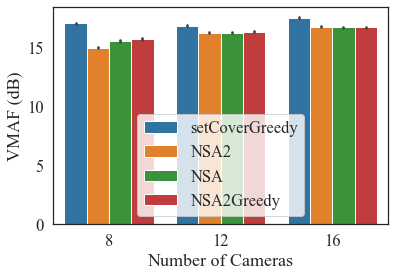

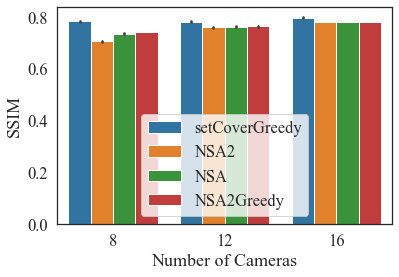

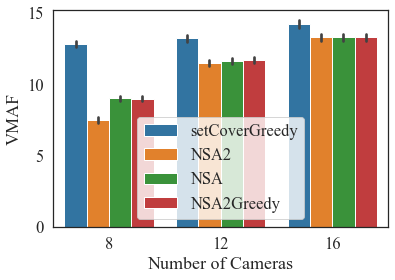

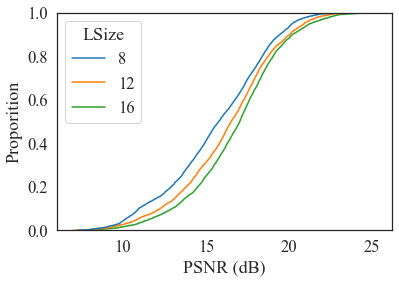

In [261]:
if __name__ == '__main__':
    # # merge code
    # expDir = Path('./exp14')
    # mergeAllCsv(expDir)
    # mergeAllCsv_withLog(expDir)

    # allResultFilePathGen = Path('.').glob('*_allResults.csv')
    allResultFilePath = Path('./exp14_allResults.csv')
    # allResultAverage(allResultFilePath)
    # allResultAverageCDF(allResultFilePath)
    # allResultAveragePose(allResultFilePath)
    # allFrameByFrame(allResultFilePath)
    # slvrAllPoseFrameByFrame(allResultFilePath)
    # NSAkmax(allResultFilePath)
    # NSA2kmax(allResultFilePath)
    # NSA_NSA2(allResultFilePath)
    # NSA_NSA2_NSA2Relaxed(allResultFilePath)
    # compareDS(allResultFilePathGen)
    # slvrNSANSA2FrameByFrame(allResultFilePath)
    # slvrNSANSA2AllPoseFrameByFrame(allResultFilePath)
    diffLSize(allResultFilePath)

    # resultFilePath1 = Path('./exp6_allResults.csv')
    # resultFilePath2 = Path('./exp7_allResults.csv')
    # diffKmaxCDF(resultFilePath1, resultFilePath2)

    # resultFilePath1 = Path('./exp5_allResults.csv')
    # resultFilePath2 = Path('./exp7_allResults.csv')
    # mergeCsv(resultFilePath1,resultFilePath2,'exp5_exp7')

    
    